# a) Performing PCA to reduce the number of independent variables

In [196]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


Populating the interactive namespace from numpy and matplotlib


/home/anshu/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'power', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [197]:
def PCA(X , num_components):
    X_meaned = X - np.mean(X , axis = 0)        #Subtract mean of each var
    covar_mat = np.cov(X_meaned , rowvar = False)             #Cal Covariance Matrix
    eigen_values , eigen_vectors = np.linalg.eigh(covar_mat)            #Compute Eigenvalues and Eigenvectors
    sorted_index = np.argsort(eigen_values)[::-1]               #Sort Eigenvalues & Eigenvectors in descending order
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    num_components = 3                      #It means our final data should be reduced to just 2 variables.
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]            #Select a subset from the rearranged Eigenvalue matrix
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()              #Transform the data 
     
    return X_reduced

In [198]:
iris_data = pd.read_csv('Iris.csv', names=['sepal length','sepal width','petal length','petal width','target'])         #Read Iris data

iris_data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [199]:
x = iris_data.iloc[:,0:4]              
target = iris_data.iloc[:,4]
matrix_reduced = PCA(x , 3)              #Applying PCA function
principal_df = pd.DataFrame(matrix_reduced , columns = ['PC1','PC2'])           #Panda dataframe for reduced dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)          #Concatinating it with target variable to make a new dataset


ValueError: Shape of passed values is (150, 3), indices imply (150, 2)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

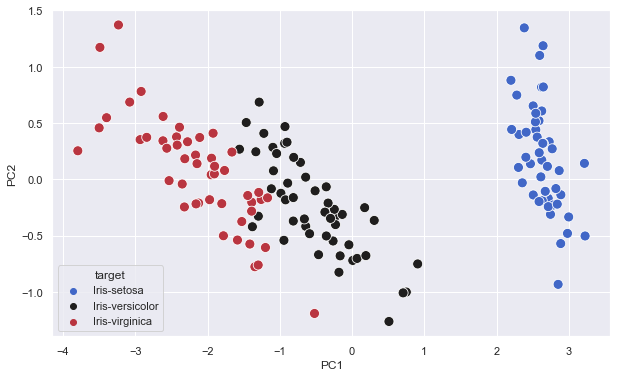

In [ ]:
plt.figure(figsize = (10,6))                #result ploting
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 100 , palette= 'icefire')

# Cluster analysis

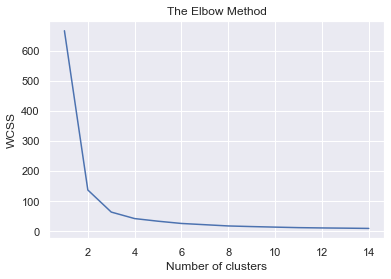

In [ ]:
matplotlib.rc("image",cmap="gray")

X=principal_df.iloc[:,0:2]

wcss=[]
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 5 7 5 2 7 7 7 4 7 2 4 2 2 7 4 7 7 2 7 2 5 2 5 7
 7 7 5 5 7 4 2 4 2 5 7 7 5 7 2 2 2 7 2 4 2 2 2 7 4 2 3 5 3 1 3 6 2 3 3 3 1
 1 1 5 5 1 1 6 6 5 3 5 6 5 3 3 5 5 1 3 3 6 1 5 1 6 1 1 5 1 3 1 5 3 3 1 5 1
 1 5]


#As elbow method with minimum deviation is at 6 to 8. So we take k=6 and perform clustring

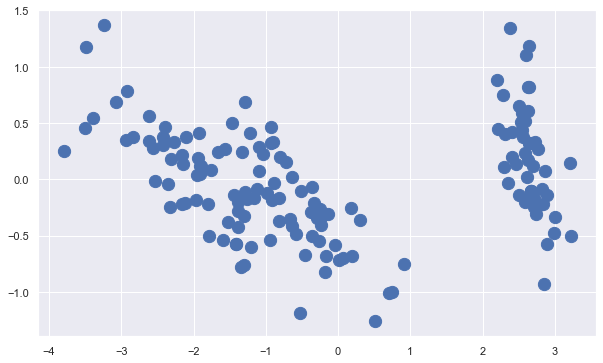

In [ ]:
matplotlib.rc("image",cmap="gray")

sb.set()
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'],principal_df['PC2'],s=150)
plt.show()

In [ ]:
x = principal_df.iloc[:,0:2] 
x


,PC1,PC2
0,2.684207,0.326607
1,2.715391,-0.169557
2,2.889820,-0.137346
3,2.746437,-0.311124
4,2.728593,0.333925
...,...,...
145,-1.944017,0.187415
146,-1.525664,-0.375021
147,-1.764046,0.078519
148,-1.901629,0.115877


In [ ]:
kmeans = KMeans(6)
kmeans.fit(x)


KMeans(n_clusters=6)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 0, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 0, 0, 4, 2, 4, 0, 4,
       0, 0, 0, 3, 3, 0, 0, 4, 4, 3, 0, 3, 4, 3, 0, 4, 3, 3, 0, 0, 4, 4,
       0, 3, 0, 4, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3], dtype=int32)

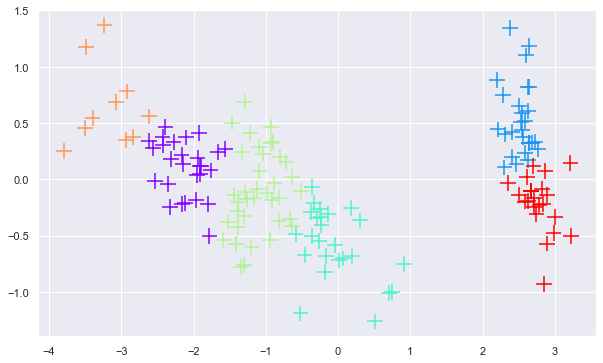

In [ ]:
#data set graph after perfoming clusttring where k=6 sub groups

data_with_clusters = principal_df.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_with_clusters['PC1'],data_with_clusters['PC2'],c=data_with_clusters['Clusters'],s=250,marker='+',cmap='rainbow')

# b) Choose any one variable as dependent and the rest being independent and perform linear regression analysis


In [ ]:
principal_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


In [ ]:
feature_cols = ['PC1']
X = principal_df[feature_cols]
y = principal_df['PC2']

lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

-5.32907051820075e-16
[1.94699394e-16]


In [201]:
X_new = pd.DataFrame({'1st_principle': [2.08]})
X_new.head()

,1st_principle
0,2.08


In [202]:
lm.predict(X_new)

array([-1.27932313e-16])

In [203]:
X_new = pd.DataFrame({'PC1': [principal_df['PC1'].min(), principal_df['PC1'].max()]})
X_new.head()


,PC1
0,-3.794687
1,3.225200


In [204]:
preds = lm.predict(X_new)
preds

array([-1.27173028e-15,  9.50375201e-17])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


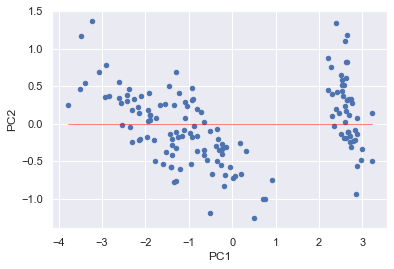

In [205]:
principal_df.plot(kind='scatter', x='PC1', y='PC2')
plt.plot(X_new, preds, c='red', linewidth=0.5)
